# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberta a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno</b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-success">
<b>Comentário geral:</b> <a class="tocSkip"></a>

Parabéns pela conclusão do projeto, Lucas! 👏🚀
Ficou muito bom, dá pra ver o quanto você evoluiu até aqui.

O projeto está aprovado! 🎉
Continue nesse ritmo, você está construindo um caminho incrível. 😉

</div>

# Passo 4: Análise exploratória de dados (Python)

## 4.1: Importando pacotes

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
import scipy.stats as st

## 4.2: Pré processamento de dados

In [3]:
df_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
df_dropoffs = pd.read_csv('/datasets/project_sql_result_04.csv')
df_weather = pd.read_csv('/datasets/project_sql_result_07.csv')
df_weather['start_ts']= pd.to_datetime(df_weather['start_ts'], format='%Y-%m-%d %H:%M:%S')

print(df_trips.info() , '\t' , df_dropoffs.info(), '\t' , df_weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   obj

<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>
    
Dados foram carregados com sucesso!

    

Após verificar os dataframes, tipos de dados OK

## 4.3 Análise

### 4.3.1 Identificando os 10 principais bairros

In [53]:
top_10_nh = df_dropoffs.sort_values('average_trips', ascending = False).head(10)
print('top 10 bairos são {}'.format(top_10_nh['dropoff_location_name'].unique()))
top_10_nh.head(10) #exibindo dataframe, por ser pequeno suficiente

top 10 bairos são ['Loop' 'River North' 'Streeterville' 'West Loop' "O'Hare" 'Lake View'
 'Grant Park' 'Museum Campus' 'Gold Coast' 'Sheffield & DePaul']


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

- Dica: adicionar `round()` para melhor visualizacao dos numeros em `average_trips`

### 4.3.2: Empresas de taxi (top 20) e seus numeros de corridas

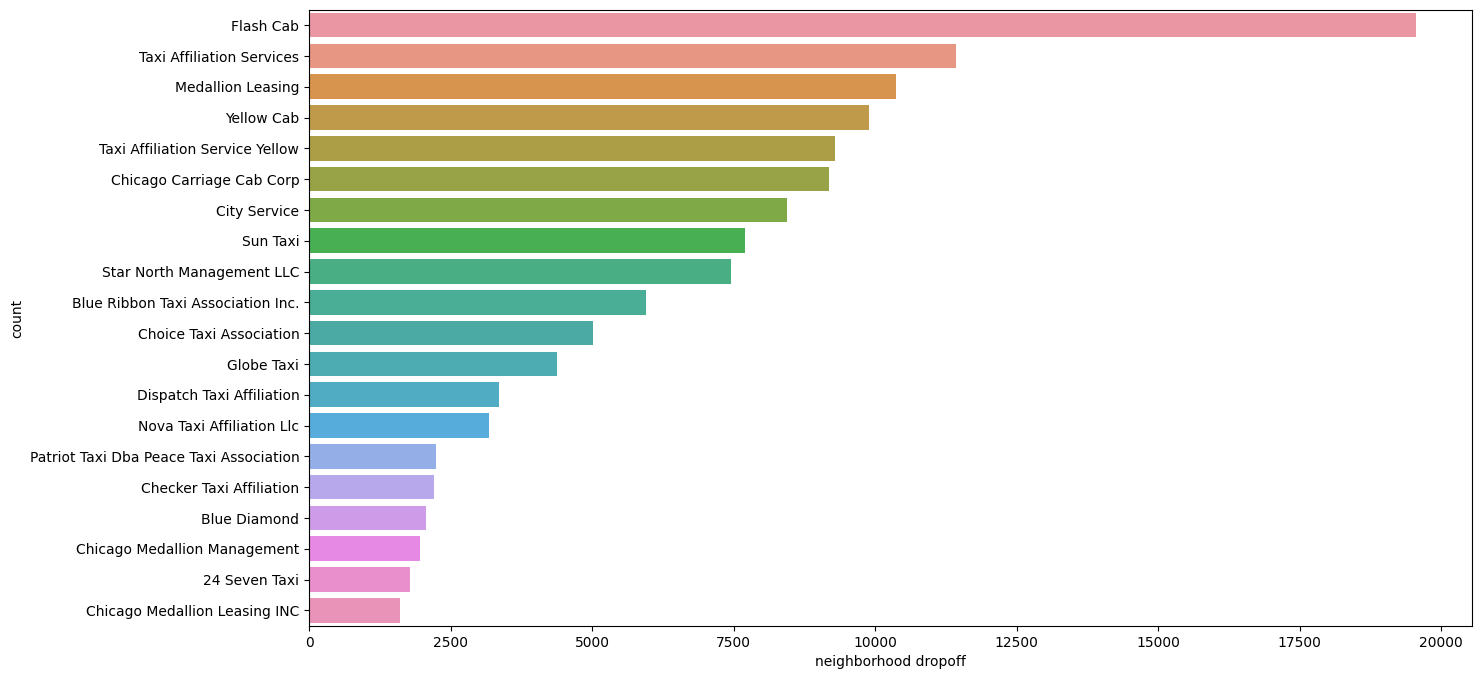

In [5]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="trips_amount", y="company_name", data=df_trips.head(20))
ax.figsize = (10,200)
ax.set_xlabel("neighborhood dropoff")
ax.set_ylabel("count")
plt.show()

Os dados indicam que a empresa Flash Cab é a que mais realiza corridas.

*Gráfico dos top 10 bairros:*

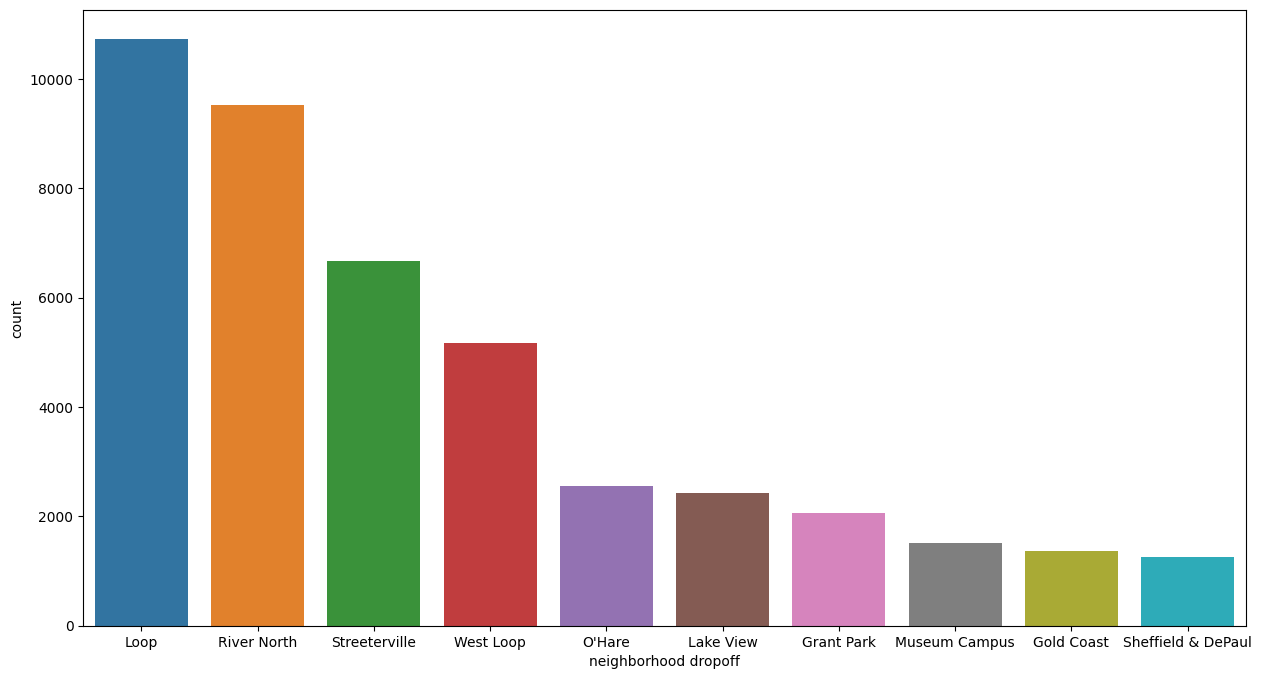

In [6]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="dropoff_location_name", y="average_trips", data=top_10_nh)
ax.figsize = (10,200)
ax.set_xlabel("neighborhood dropoff")
ax.set_ylabel("count")
plt.show()

<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>
    
- Todas as análises e gráficos estão corretos. Parabéns!
- Foram adicionados comentários relevantes para análise.
</div>

# PASSO 5

A hipótese nula será que a condição climática não influencia o desempenho da empresa.

o nível de significância (Alpha) escolhido foi de 0.05, por ser o padrão da indústria.

In [12]:
df_weather['DOW'] = df_weather['start_ts'].dt.dayofweek
df_weather.head(5)

,start_ts,weather_conditions,duration_seconds,DOW
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5


In [19]:
#criando df dos user_scores para dias de chuva e sol

df_sat_rain = df_weather.query('weather_conditions == "Bad" and DOW == 5')
df_sat_clear = df_weather.query('weather_conditions == "Good" and DOW == 5')

#calculando variância da amostra
var_rain = df_sat_rain['duration_seconds'].var()
var_clear = df_sat_clear['duration_seconds'].var()
#print(var_rain, var_clear)

alpha = .05

t_statistic_ind, p_value_ind = st.ttest_ind(df_sat_rain['duration_seconds'], df_sat_clear['duration_seconds'], equal_var = (var_rain == var_clear))

print(f"Alpha: {alpha}\nHipótese alternativa = Há diferença nas durações das corridas\nHipótese nula = Não há diferença nas durações \n")
if (p_value_ind < alpha):
    print("Resultado: H1, Rejeitamos a hipótese nula")
else:
    print("Resultado: H0, Não podemos rejeitar a hipótese nula")
print(f'Valor P = {p_value_ind}')

Alpha: 0.05
Hipótese alternativa = Há diferença nas durações das corridas
Hipótese nula = Não há diferença nas durações 

Resultado: H1, Rejeitamos a hipótese nula
Valor P = 6.738994326108734e-12


In [ ]:
<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>
    
O teste foi realizado corretamente!

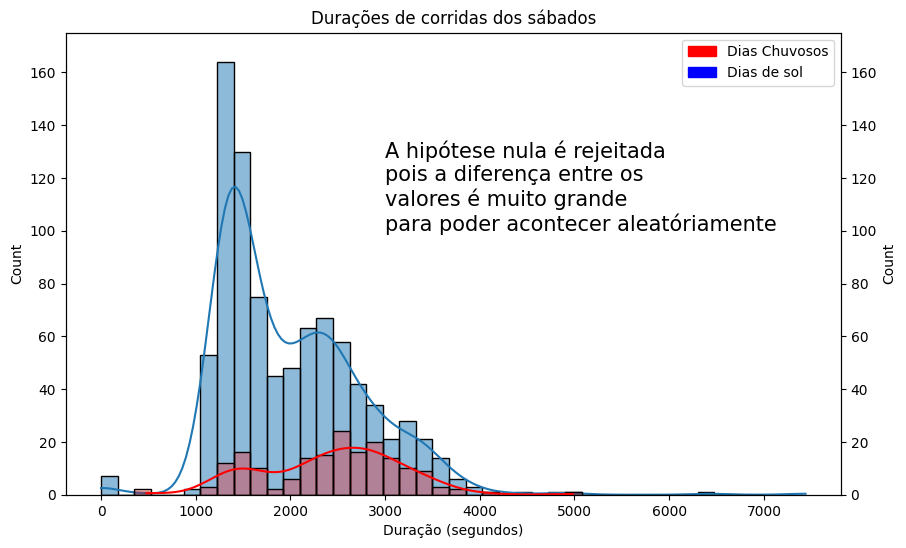

In [26]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
sns.histplot(df_sat_rain, x = 'duration_seconds', bins = 40,binrange = (0, 7000), kde=True,color = 'red', alpha = 0.3, ax = ax2)
sns.histplot(df_sat_clear, x = 'duration_seconds', bins = 40,binrange = (0, 7000), kde=True, alpha = 0.5, ax = ax1)

# Criar proxy artists para a legenda

ax1.set_ylim(0,175)
ax2.set_ylim(0,175)
red_patch = mpatches.Patch(color='red', label='Dias Chuvosos')
blue_patch = mpatches.Patch(color='blue', label='Dias de sol')
plt.legend(handles=[red_patch, blue_patch])
ax1.set_xlabel('Duração (segundos)')
plt.title('Durações de corridas dos sábados')
plt.text(3000, 100, 'A hipótese nula é rejeitada\npois a diferença entre os\nvalores é muito grande\npara poder acontecer aleatóriamente', fontsize=15)
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário: </b> <a class="tocSkip"></a> 
    
Adorei o grafico! :) 